In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd
df = pd.read_csv('Carsignal.csv')

In [2]:
df.head()

,Unnamed: 0,Timestamp,ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Attack_Type
0,578323,253.250801,02a0000,8,02,00,64,9d,db,0c,ba,02,Attack_free
1,965182,422.646903,0164000,8,00,08,00,00,00,00,06,0e,Attack_free
2,126519,67.240896,018f000,8,00,34,17,00,00,3f,00,00,DoS_attack
3,542391,309.305666,0382000,8,40,fe,0f,00,00,00,00,08,Fuzzy_attack
4,2170607,950.534813,0545000,8,d8,0d,00,8b,10,00,10,00,Attack_free


In [3]:
df.describe()

,Unnamed: 0,Timestamp,DLC
count,3.618000e+04,36180.000000,36180.000000
mean,8.832141e+05,395.439727,7.554616
std,7.023117e+05,302.158486,1.618489
min,3.000000e+01,0.007862,0.000000
25%,2.997750e+05,145.569882,8.000000
50%,6.044670e+05,289.845738,8.000000
75%,1.466575e+06,642.224460,8.000000
max,2.369284e+06,1037.544850,8.000000


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Timestamp', axis=1)


dropping column becuase they add no value to prediuction and data analysis 

Checking Null values, sum gives number of null values in each row 

In [5]:
print(df.isnull().sum())

ID                0
DLC               0
DATA0          1248
DATA1          1248
DATA2          1323
DATA3          1445
DATA4          1724
DATA5          3042
DATA6          3042
DATA7          3042
Attack_Type       0
dtype: int64


In [6]:
pd.unique(df['DATA5'])

array(['0c', '00', '3f', 'ce', '18', '96', nan, 'f6', '43', 'f1', 'fb',
       '11', '5c', 'ff', 'cc', '2d', '8f', '17', 'c0', '2f', 'a9', '7c',
       '10', '64', '01', '08', '13', 'e1', 'cd', '9b', '4b', '90', '93',
       'bc', '8d', 'f0', '28', '19', '14', '15', '70', '2e', 'd0', '1a',
       '1c', 'e8', 'f8', 'f5', '24', '88', '89', '7e', '1d', '0e', 'c8',
       '9a', '8e', '22', '7a', '3b', '2c', '8b', '68', '8a', '98', 'ba',
       'bd', '04', '8c', '29', '0f', '6b', 'c2', '92', 'ac', '40', '56',
       '34', '20', '30', '54', 'f7', '6a', '1f', 'eb', 'b8', '09', 'b3',
       'bb', '60', '7b', '25', 'cb', 'c4', 'e4', '82', 'ca', 'ae', 'dc',
       '95', '31', '6c', '23', '44', '50', '62', 'b7', '57', '3e', 'a8',
       '71', '52', 'e3', '6d', 'ec', '74', 'fc', '7d', 'b0', '4f', '38',
       'd8', 'aa', 'f3', '77', '80', '5f', '65', 'c3', '76', 'e0', '91',
       '48', 'dd', 'a0', 'f4', '4c', 'fa', '33', 'bf', '73', 'd4', '5a',
       '46', '58', '1b', '42', '9f', '5b', 'b9', '94

In [7]:
len(pd.unique(df['DATA5']))

257

list of unique values 

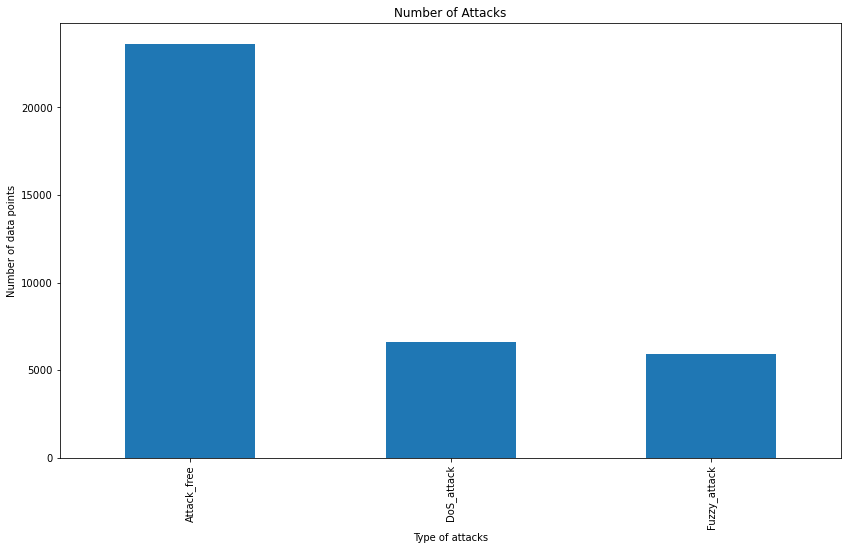

In [8]:
ax = df['Attack_Type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Attacks")
ax.set_xlabel("Type of attacks")
ax.set_ylabel("Number of data points")
plt.show()



Grpahs shows number of differnt attacks in data points 


<AxesSubplot:>

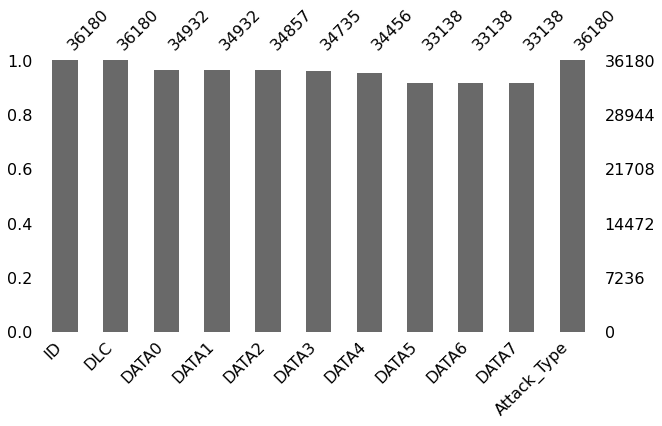

In [9]:
import missingno as msno
msno.bar(df,figsize=(10,5))

Grpah shows number of non empty attributes and it clear that there are empty values in dataframe. 

In [10]:
print("percentage of nan values in Data0 column in train data", round(df['DATA0'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data1 column in train data", round(df['DATA1'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data2 column in train data", round(df['DATA2'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data3 column in train data", round(df['DATA3'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data4 column in train data", round(df['DATA4'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data5 column in train data", round(df['DATA5'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data6 column in train data", round(df['DATA6'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data7 column in train data", round(df['DATA7'].isnull().sum()*100/len(df),3))

percentage of nan values in Data0 column in train data 3.449
percentage of nan values in Data1 column in train data 3.449
percentage of nan values in Data2 column in train data 3.657
percentage of nan values in Data3 column in train data 3.994
percentage of nan values in Data4 column in train data 4.765
percentage of nan values in Data5 column in train data 8.408
percentage of nan values in Data6 column in train data 8.408
percentage of nan values in Data7 column in train data 8.408


Above graph shows null values in data sets, number of variables in column to column and it shows number of not null values. null values must be filled and this issues is due to number of data points. It is also important for filling null value which does not effects analysis. "NO" will be used for filling null values. 

In [11]:
df.fillna("NO", inplace = True)

<AxesSubplot:>

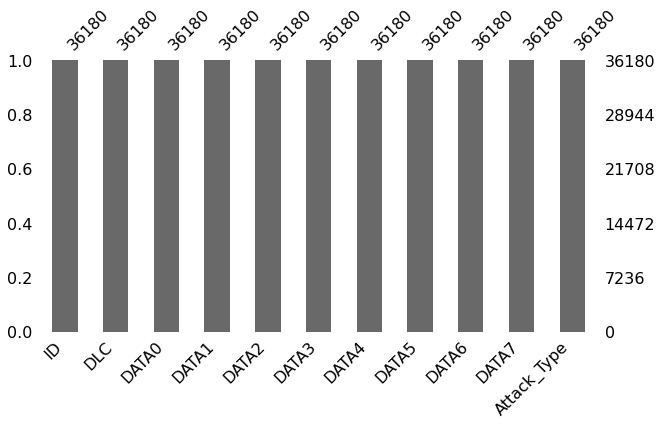

In [12]:
import missingno as msno
msno.bar(df,figsize=(10,5))

In [13]:
len(pd.unique(df['DATA5']))

257

    Till now data points are viewed as individual points. to get full insight, it is neccessary to observer data pattrens and this can be done by adding data points into single attribute and find pattrens 

In [14]:
print("percentage of nan values in Data0 column in train data", round(df['DATA0'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data1 column in train data", round(df['DATA1'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data2 column in train data", round(df['DATA2'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data3 column in train data", round(df['DATA3'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data4 column in train data", round(df['DATA4'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data5 column in train data", round(df['DATA5'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data6 column in train data", round(df['DATA6'].isnull().sum()*100/len(df),3))
print("percentage of nan values in Data7 column in train data", round(df['DATA7'].isnull().sum()*100/len(df),3))


percentage of nan values in Data0 column in train data 0.0
percentage of nan values in Data1 column in train data 0.0
percentage of nan values in Data2 column in train data 0.0
percentage of nan values in Data3 column in train data 0.0
percentage of nan values in Data4 column in train data 0.0
percentage of nan values in Data5 column in train data 0.0
percentage of nan values in Data6 column in train data 0.0
percentage of nan values in Data7 column in train data 0.0


most of data is categorical data and it is not ideal for data anysis and machine model. using label encioder data is converted inti numerical values for esay calculation

In [15]:
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()
le.fit(df['ID'])

df['ID'] = le.transform(df['ID'])

In [17]:
le = preprocessing.LabelEncoder()
le.fit(df['DLC'])

df['DLC'] = le.transform(df['DLC'])

In [18]:
le = preprocessing.LabelEncoder()
le.fit(df['DATA0'])

df['DATA0'] = le.transform(df['DATA0'])

In [19]:
le = preprocessing.LabelEncoder()
le.fit(df['DATA1'])

df['DATA1'] = le.transform(df['DATA1'])

In [20]:
le = preprocessing.LabelEncoder()
le.fit(df['DATA2'])

df['DATA2'] = le.transform(df['DATA2'])

In [21]:
le = preprocessing.LabelEncoder()
le.fit(df['DATA3'])

df['DATA3'] = le.transform(df['DATA3'])

In [22]:
le = preprocessing.LabelEncoder()
le.fit(df['DATA4'])

df['DATA4'] = le.transform(df['DATA4'])

In [23]:
le = preprocessing.LabelEncoder()
le.fit(df['DATA5'])

df['DATA5'] = le.transform(df['DATA5'])

In [24]:
le = preprocessing.LabelEncoder()
le.fit(df['DATA6'])

df['DATA6'] = le.transform(df['DATA6'])

In [25]:
le = preprocessing.LabelEncoder()
le.fit(df['DATA7'])

df['DATA7'] = le.transform(df['DATA7'])


In [26]:
le = preprocessing.LabelEncoder()
le.fit(df['Attack_Type'])

df['Attack_Type'] = le.transform(df['Attack_Type'])



Checking correlation between input and output attributes using f score. F-score is method for calculating correlations. for that daraframe is spliited into input and output variable and training and testing data

In [27]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 1)

x_train = training_set.drop(['Attack_Type'], axis = 1)

x_test = test_set.drop(['Attack_Type'], axis = 1)

y_train = training_set['Attack_Type']
y_test = test_set['Attack_Type']

calucating f score using selectk best and f_classif

In [28]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

fs = SelectKBest(score_func=f_classif, k='all')

fs.fit(x_train, y_train)

X_train_fs = fs.transform(x_train)

X_train_fs

X_test_fs = fs.transform(x_test)




score of features is given below and it is listed as index values (same pattren as data frame)

In [29]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    




Feature 0: 2854.190851
Feature 1: 109.826562
Feature 2: 589.640452
Feature 3: 608.324957
Feature 4: 793.227301
Feature 5: 629.438245
Feature 6: 589.957915
Feature 7: 666.862248
Feature 8: 970.832487
Feature 9: 781.844645


grpah showing score of features

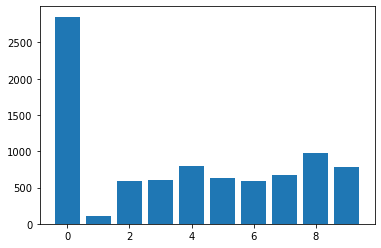

In [30]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

calculating correlation using extratreesclassifer and this model training model and using testing data score of importance is given

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
print(model.feature_importances_) 




[0.21127061 0.02282615 0.11326066 0.12904804 0.13964456 0.06151353
 0.08763091 0.10096775 0.07391335 0.05992444]


this grpahs shows list of attribute with score and it is data 7 and data 3 add less values in proeduction and it can be removed for increasing prediction and rediuing computation load


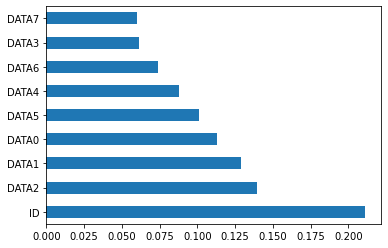

In [32]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(df, ['Attack_Type', 'DATA0']);

In [33]:
df.describe()

,ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Attack_Type
count,36180.000000,36180.000000,36180.000000,36180.000000,36180.000000,36180.000000,36180.000000,36180.000000,36180.000000,36180.000000,36180.000000
mean,23.581177,4.757269,70.383637,60.219956,67.434522,63.385766,66.480652,57.211028,47.186871,61.861498,0.510392
std,13.200582,0.966568,93.171351,76.391080,80.715367,84.849744,92.307671,80.865920,69.734771,77.628210,0.760038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,5.000000,11.000000,23.000000,16.000000,9.000000,12.000000,12.000000,8.000000,16.000000,0.000000
75%,33.000000,5.000000,158.000000,128.000000,127.000000,138.000000,131.000000,124.000000,82.000000,132.000000,1.000000
max,54.000000,5.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,2.000000


<AxesSubplot:>

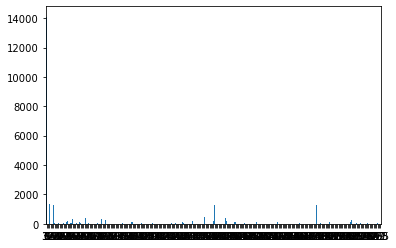

In [34]:
df['DATA0'].value_counts(sort=False).plot.bar(rot=0)

In [35]:
df.head()

,ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Attack_Type
0,24,5,2,0,100,157,220,12,187,2,0
1,15,5,0,8,0,0,0,0,6,14,0
2,18,5,0,52,23,0,0,63,0,0,1
3,32,5,64,255,15,0,0,0,0,8,2
4,45,5,217,13,0,139,16,0,16,0,0


Empty rows are filled value "NO" for analysis but this empty values is determined by value in DLC (it is lenght of message). there are 6 kinds of messages with varrying length

In [36]:
import pandas as pd
df = pd.read_csv('Carsignal.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Timestamp', axis=1)
df.head()

,ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Attack_Type
0,02a0000,8,02,00,64,9d,db,0c,ba,02,Attack_free
1,0164000,8,00,08,00,00,00,00,06,0e,Attack_free
2,018f000,8,00,34,17,00,00,3f,00,00,DoS_attack
3,0382000,8,40,fe,0f,00,00,00,00,08,Fuzzy_attack
4,0545000,8,d8,0d,00,8b,10,00,10,00,Attack_free


In [37]:
pd.unique(df['DLC'])

array([8, 0, 4, 5, 2, 3])

In [38]:
df1 = df[df['DLC'] == 0]

In [39]:
print(df1.isnull().sum())

ID                0
DLC               0
DATA0          1248
DATA1          1248
DATA2          1248
DATA3          1248
DATA4          1248
DATA5          1248
DATA6          1248
DATA7          1248
Attack_Type       0
dtype: int64


<AxesSubplot:>

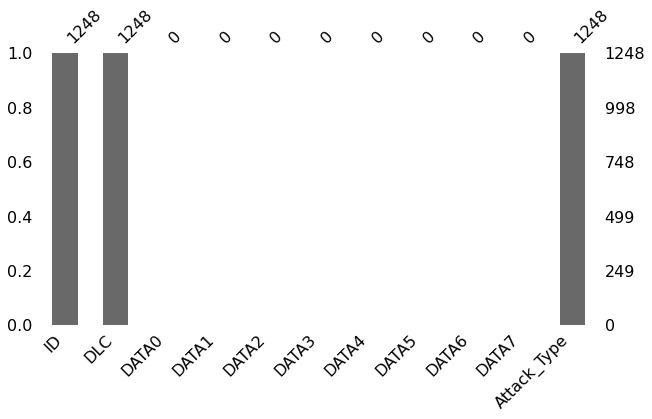

In [40]:
import missingno as msno
msno.bar(df1,figsize=(10,5))

In [41]:
df2 = df[df['DLC'] == 2]

In [42]:
print(df2.isnull().sum())

ID              0
DLC             0
DATA0           0
DATA1           0
DATA2          75
DATA3          75
DATA4          75
DATA5          75
DATA6          75
DATA7          75
Attack_Type     0
dtype: int64


<AxesSubplot:>

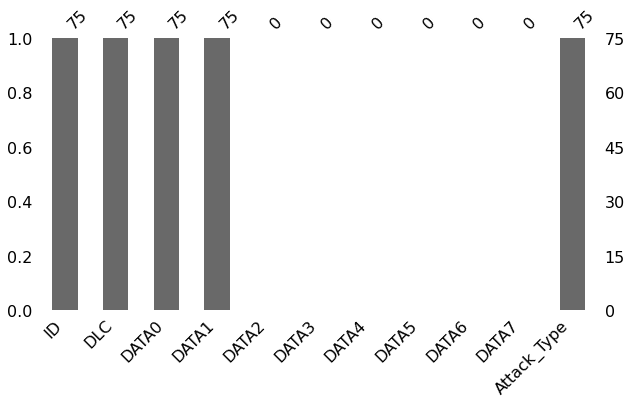

In [43]:
import missingno as msno
msno.bar(df2,figsize=(10,5))

<AxesSubplot:>

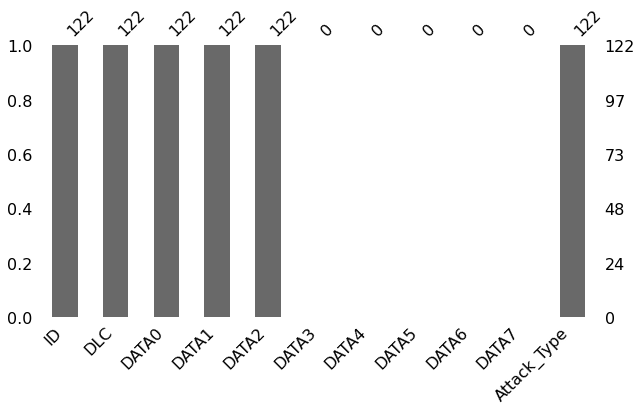

In [44]:
df3 = df[df['DLC'] == 3]
import missingno as msno
msno.bar(df3,figsize=(10,5))



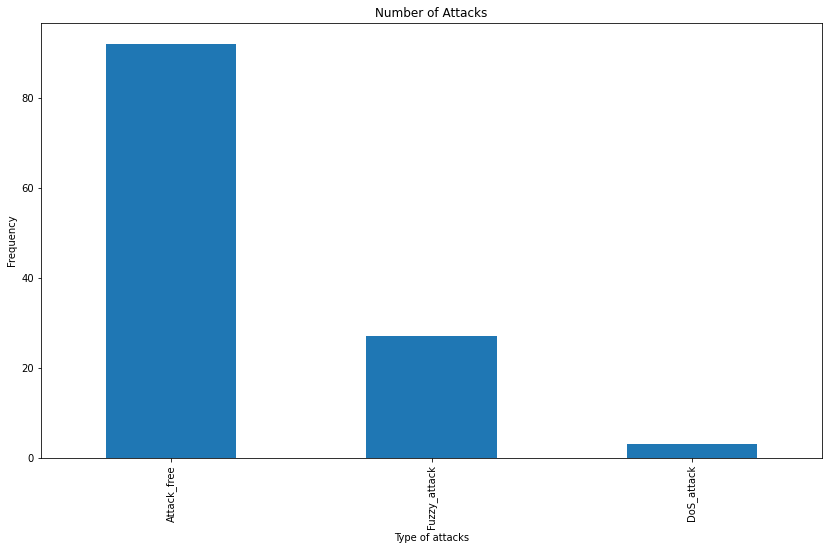

In [45]:
ax = df3['Attack_Type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Attacks")
ax.set_xlabel("Type of attacks")
ax.set_ylabel("Frequency")
plt.show()



<AxesSubplot:>

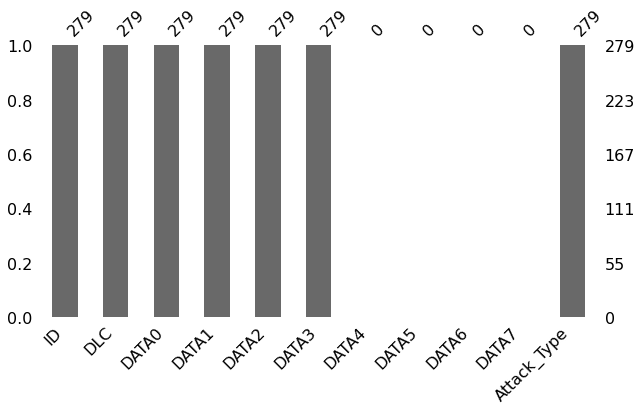

In [46]:
df4 = df[df['DLC'] == 4]
import missingno as msno
msno.bar(df4,figsize=(10,5))



<AxesSubplot:>

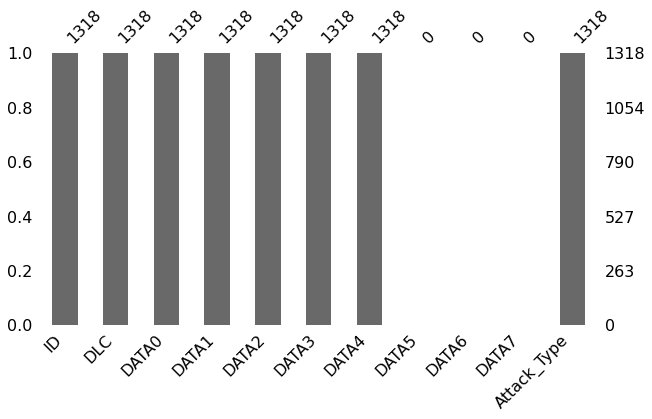

In [47]:
df5 = df[df['DLC'] == 5]
import missingno as msno
msno.bar(df5,figsize=(10,5))



<AxesSubplot:>

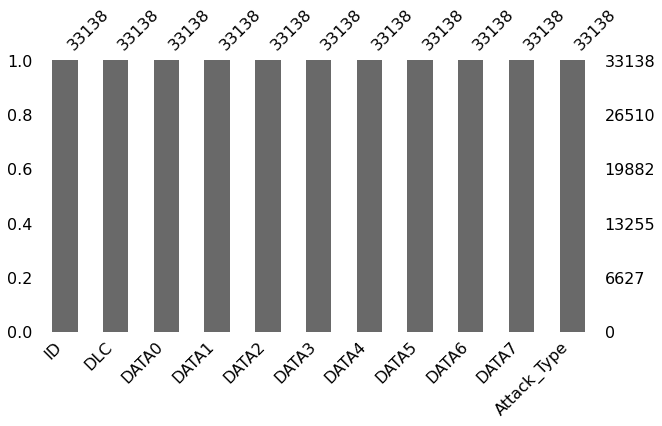

In [48]:
df6 = df[df['DLC'] == 8]
import missingno as msno
msno.bar(df6,figsize=(10,5))



In [49]:
df.head()

,ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Attack_Type
0,02a0000,8,02,00,64,9d,db,0c,ba,02,Attack_free
1,0164000,8,00,08,00,00,00,00,06,0e,Attack_free
2,018f000,8,00,34,17,00,00,3f,00,00,DoS_attack
3,0382000,8,40,fe,0f,00,00,00,00,08,Fuzzy_attack
4,0545000,8,d8,0d,00,8b,10,00,10,00,Attack_free


In [50]:
df10 = df[df['Attack_Type'] == "Attack_free"]

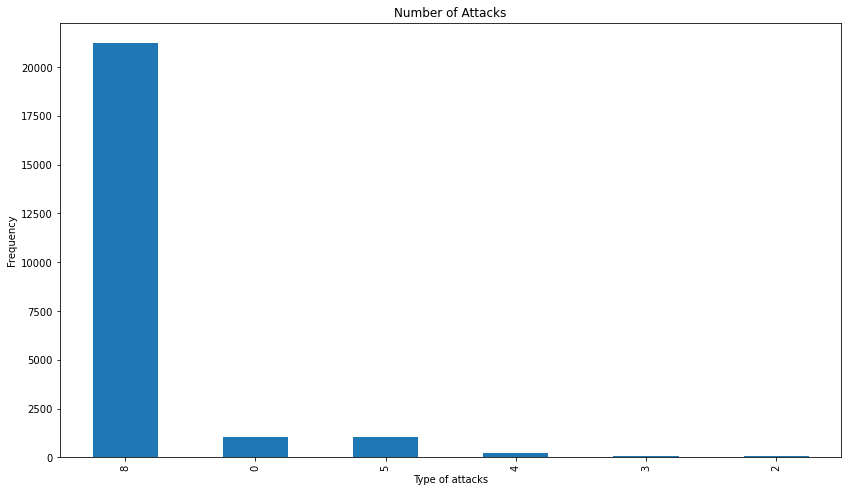

In [51]:
ax = df10['DLC'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Attacks")
ax.set_xlabel("Type of attacks")
ax.set_ylabel("Frequency")
plt.show()

data signal is divided into 8 bits and each bit is considered as attribute and data point and this attempt to combone all data points and anaysis results.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [53]:
signal = pd.DataFrame()

In [54]:
signal['DATA'] = df['DATA0'] + df['DATA1'] + df['DATA2']+ df['DATA3']+ df['DATA4']+ df['DATA5']+ df['DATA6']+ df['DATA7']

In [55]:
signal.head()

,DATA
0,0200649ddb0cba02
1,000800000000060e
2,00341700003f0000
3,40fe0f0000000008
4,d80d008b10001000


In [56]:

signal['Attack_Type'] = df['Attack_Type']



signal['DLC'] = df['DLC']
signal['ID'] = df['ID']

In [57]:
df.shape

(36180, 11)

In [58]:
len(pd.unique(signal['DATA']))

10837

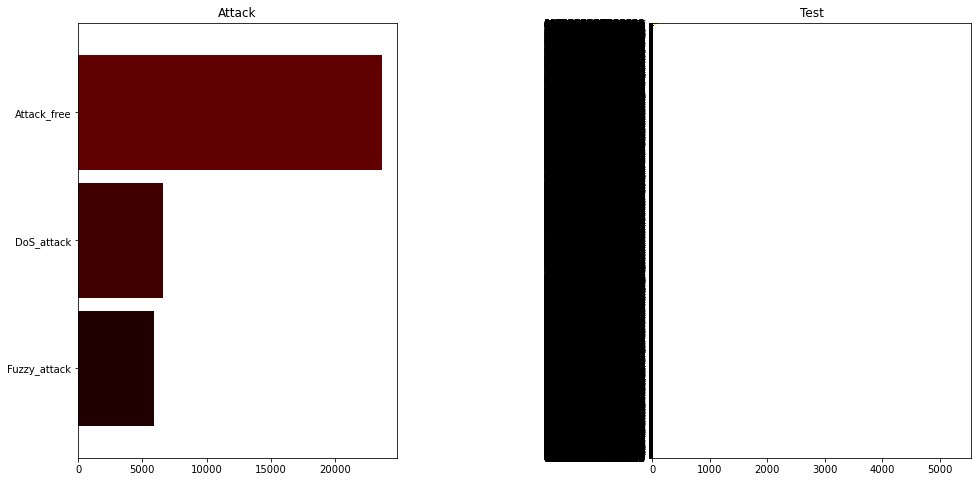

In [59]:

f,ax=plt.subplots(1,2,figsize=(16,8))
signal['Attack_Type'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('afmhot',15),ax=ax[0])
signal['DATA'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('afmhot',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('Attack')
ax[1].set_title('Test')
plt.show()

In [60]:
signal = pd.DataFrame()

In [61]:
signal['DATA'] = df['DATA0'] + df['DATA1'] + df['DATA2']+ df['DATA3']+ df['DATA4']+ df['DATA5']+ df['DATA6']+ df['DATA7']

In [62]:
signal.head()

,DATA
0,0200649ddb0cba02
1,000800000000060e
2,00341700003f0000
3,40fe0f0000000008
4,d80d008b10001000


In [63]:

signal['Attack_Type'] = df['Attack_Type']



signal['DLC'] = df['DLC']
signal['ID'] = df['ID']

In [64]:
df.shape

(36180, 11)

In [65]:
len(pd.unique(signal['DATA']))

10837

In [ ]:

f,ax=plt.subplots(1,2,figsize=(16,8))
signal['Attack_Type'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('afmhot',15),ax=ax[0])
signal['DATA'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('afmhot',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('Attack')
ax[1].set_title('Test')
plt.show()